In [1]:
import numpy as np 
import pandas as pd
import seaborn as sb 
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv('Data/world_tourism_economy_data.csv', sep=',')
df.head(10)

,country,country_code,year,tourism_receipts,tourism_arrivals,tourism_exports,tourism_departures,tourism_expenditures,gdp,inflation,unemployment
0,Aruba,ABW,1999,7.820000e+08,9.720000e+05,62.542949,NaN,9.495387,1.722905e+09,2.280372,NaN
1,Africa Eastern and Southern,AFE,1999,8.034209e+09,1.530938e+07,12.204030,NaN,7.760536,2.654293e+11,7.819865,NaN
2,Afghanistan,AFG,1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,1999,1.443613e+09,3.897975e+06,3.974476,NaN,6.147291,1.394683e+11,0.372266,NaN
4,Angola,AGO,1999,3.100000e+07,4.500000e+04,0.583858,NaN,2.489638,6.152923e+09,248.195902,NaN
5,Albania,ALB,1999,2.180000e+08,3.710000e+05,55.969191,NaN,3.699007,3.212122e+09,0.389438,18.40
6,Andorra,AND,1999,NaN,9.422000e+06,NaN,NaN,NaN,1.240295e+09,NaN,NaN
7,Arab World,ARB,1999,NaN,NaN,NaN,NaN,NaN,6.654154e+11,2.669374,NaN
8,United Arab Emirates,ARE,1999,8.930000e+08,NaN,NaN,NaN,NaN,8.444547e+10,NaN,NaN
9,Argentina,ARG,1999,3.175000e+09,2.898000e+06,11.340372,NaN,15.889092,2.835230e+11,NaN,14.05


In [3]:
total_na_per_column = df.isna().sum()
print(f"Total number of NAN values in DataFrame is : {total_na_per_column}")

Total number of NAN values in DataFrame is : country                    0
country_code               0
year                       0
tourism_receipts        2361
tourism_arrivals        1701
tourism_exports         2536
tourism_departures      4061
tourism_expenditures    2477
gdp                      226
inflation                982
unemployment            2992
dtype: int64


### It is clear that all columns in the dataframe, except country, country_code and year, have missing values, with tourism_departures having the highest number of missing values

### We will attempt 2 methods in this process;

#### 1 : Filling in missing values with the mean of their respective columns

#### 2 : Removing missing values

## Method 1

In [4]:
# In order to solve the problem of missing values, we fill the missing values with the mean of the respective columns, ensuring no adverse changes to the distribution of data in each column
df_numeric = df.drop(columns=['country','country_code','year'],axis=1,inplace=False) # Drop non-numeric columns and year column
df_numeric = df_numeric.fillna(df_numeric.mean())
columns_to_insert = ['country', 'country_code', 'year']
target_indexes = [0, 1, 2]
for col, idx in zip(columns_to_insert, target_indexes): # Re-inserting the removed columns
    df_numeric.insert(idx, col, df[col])
df_copy = df_numeric.copy() # To ensure version control, reduce unnecessary changes to original data
df_copy.head(10)

,country,country_code,year,tourism_receipts,tourism_arrivals,tourism_exports,tourism_departures,tourism_expenditures,gdp,inflation,unemployment
0,Aruba,ABW,1999,7.820000e+08,9.720000e+05,62.542949,8.246093e+07,9.495387,1.722905e+09,2.280372,7.961191
1,Africa Eastern and Southern,AFE,1999,8.034209e+09,1.530938e+07,12.204030,8.246093e+07,7.760536,2.654293e+11,7.819865,7.961191
2,Afghanistan,AFG,1999,3.062956e+10,6.263894e+07,15.506851,8.246093e+07,6.652740,2.089999e+12,6.319369,7.961191
3,Africa Western and Central,AFW,1999,1.443613e+09,3.897975e+06,3.974476,8.246093e+07,6.147291,1.394683e+11,0.372266,7.961191
4,Angola,AGO,1999,3.100000e+07,4.500000e+04,0.583858,8.246093e+07,2.489638,6.152923e+09,248.195902,7.961191
5,Albania,ALB,1999,2.180000e+08,3.710000e+05,55.969191,8.246093e+07,3.699007,3.212122e+09,0.389438,18.400000
6,Andorra,AND,1999,3.062956e+10,9.422000e+06,15.506851,8.246093e+07,6.652740,1.240295e+09,6.319369,7.961191
7,Arab World,ARB,1999,3.062956e+10,6.263894e+07,15.506851,8.246093e+07,6.652740,6.654154e+11,2.669374,7.961191
8,United Arab Emirates,ARE,1999,8.930000e+08,6.263894e+07,15.506851,8.246093e+07,6.652740,8.444547e+10,6.319369,7.961191
9,Argentina,ARG,1999,3.175000e+09,2.898000e+06,11.340372,8.246093e+07,15.889092,2.835230e+11,6.319369,14.050000


### Begin by exploring the data

In [5]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               6650 non-null   object 
 1   country_code          6650 non-null   object 
 2   year                  6650 non-null   int64  
 3   tourism_receipts      6650 non-null   float64
 4   tourism_arrivals      6650 non-null   float64
 5   tourism_exports       6650 non-null   float64
 6   tourism_departures    6650 non-null   float64
 7   tourism_expenditures  6650 non-null   float64
 8   gdp                   6650 non-null   float64
 9   inflation             6650 non-null   float64
 10  unemployment          6650 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 571.6+ KB


# What is the Question we are looking to answer here? We construct a correlation matrix to figure out the relationship between the variables provided to us

In [6]:
df_copy_numerical = df_copy.drop(['country','country_code'],axis=1) # This subset of data is required to construct a correlation matrix

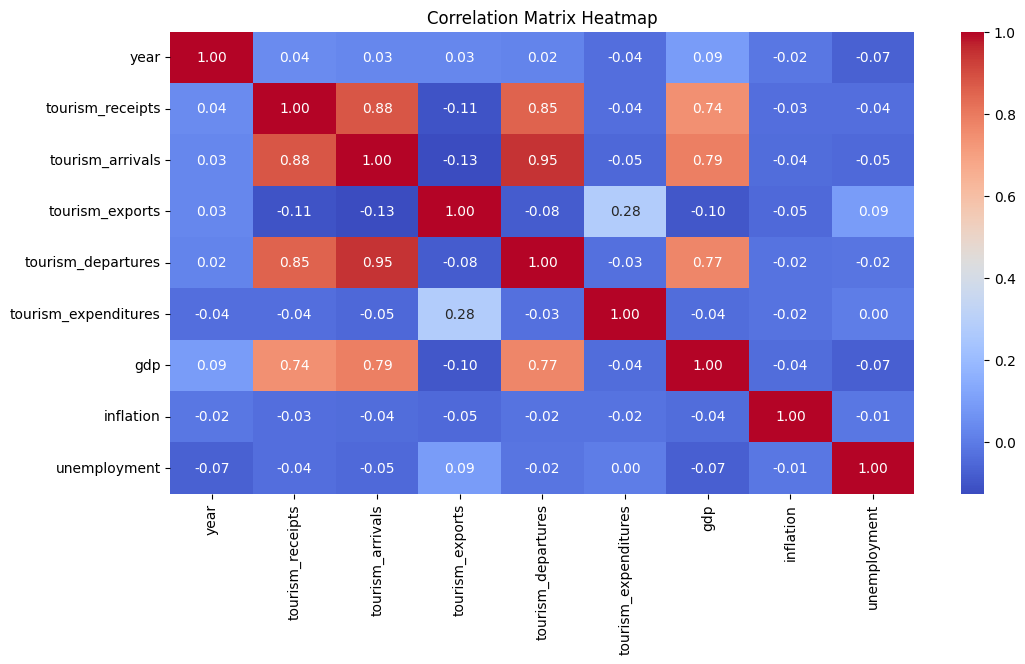

In [7]:
plt.figure(figsize=(12, 6))
sb.heatmap(df_copy_numerical.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

### From the above correlation matrix, it is clear that tourism_departures and tourism_arrivals have the strongest positive correlation with one another. 

### In the context of gdp, it has the strongest positive correlation with tourism_arrivals. 

### With the above information, we proceed to analyse information pertaining to gdp and tourism_arrivals

In [8]:
df_copy = df_copy[['country','year','tourism_receipts','tourism_arrivals','tourism_exports','tourism_expenditures','gdp','inflation','unemployment']]
df_copy # We proceed to work with a targeted dataset

,country,year,tourism_receipts,tourism_arrivals,tourism_exports,tourism_expenditures,gdp,inflation,unemployment
0,Aruba,1999,7.820000e+08,9.720000e+05,62.542949,9.495387,1.722905e+09,2.280372,7.961191
1,Africa Eastern and Southern,1999,8.034209e+09,1.530938e+07,12.204030,7.760536,2.654293e+11,7.819865,7.961191
2,Afghanistan,1999,3.062956e+10,6.263894e+07,15.506851,6.652740,2.089999e+12,6.319369,7.961191
3,Africa Western and Central,1999,1.443613e+09,3.897975e+06,3.974476,6.147291,1.394683e+11,0.372266,7.961191
4,Angola,1999,3.100000e+07,4.500000e+04,0.583858,2.489638,6.152923e+09,248.195902,7.961191
...,...,...,...,...,...,...,...,...,...
6645,Kosovo,2023,3.062956e+10,6.263894e+07,15.506851,6.652740,1.046822e+10,4.944324,7.961191
6646,"Yemen, Rep.",2023,3.062956e+10,6.263894e+07,15.506851,6.652740,2.089999e+12,6.319369,7.961191
6647,South Africa,2023,3.062956e+10,6.263894e+07,15.506851,6.652740,3.806993e+11,6.073909,32.098000
6648,Zambia,2023,3.062956e+10,6.263894e+07,15.506851,6.652740,2.757796e+10,10.884532,7.961191


## Now, we proceed to inspect the 'country' column, in order to isolate specialised sub-groups

In [9]:
target_country_subgroups = [
    'High income', 
    'Heavily indebted poor countries (HIPC)', 
    'IDA total', 
    'IDA blend', 
    'Least developed countries: UN classification', 
    'OECD members', 
    'Pre-demographic dividend', 
    'Post-demographic dividend', 
    'Latin America & the Caribbean (IDA & IBRD countries)', 
    'Middle East & North Africa (IDA & IBRD countries)', 
    'Sub-Saharan Africa (IDA & IBRD countries)', 
    'World', 
    'Lower middle income', 
    'Early-demographic dividend', 
    'IDA only', 
    'Arab World', 
    'Fragile and conflict affected situations', 
    'Low income', 
    'Europe & Central Asia (IDA & IBRD countries)', 
    'Small state'
]

df_country_subgroups = df_copy[df_copy['country'].isin(target_country_subgroups)]
df_copy_filtered = df_copy[~df_copy['country'].isin(target_country_subgroups)]
df_copy_filtered.reset_index(drop=True,inplace=True)

In [10]:
# Now, we proceed to pivot the dataframe, so that we can view changes by year

pivoted_df_filtered = df_copy_filtered.pivot_table(
    index='country',       
    columns='year',      
    values=['gdp','tourism_receipts', 'tourism_exports', 'tourism_arrivals','tourism_expenditures','inflation','unemployment'],
    aggfunc='mean' # We aggregate such that the mean of each metric is computed for each year
)

In [11]:
pivoted_df_specialised = df_country_subgroups.pivot_table(
    index='country',       
    columns='year',      
    values=['gdp','tourism_receipts', 'tourism_exports', 'tourism_arrivals', 'tourism_expenditures','inflation','unemployment'],
    aggfunc='mean' 
)

### First, we plot and analyse the changes in GDP VS tourism_arrivals, to observe correlations (if any)

In [12]:
gdp_data = pivoted_df_filtered['gdp']
tourism_data = pivoted_df_filtered['tourism_arrivals']

countries = gdp_data.index

fig = go.Figure()

initial_country = countries[0]  # Default to the first country
gdp_country = gdp_data.loc[initial_country]
tourism_country = tourism_data.loc[initial_country]


fig.add_trace(
    go.Scatter(
        x=gdp_country.index, 
        y=gdp_country.values,
        mode='lines+markers',
        name='GDP',
        yaxis='y1'
    )
)

fig.add_trace(
    go.Scatter(
        x=tourism_country.index, 
        y=tourism_country.values,
        mode='lines+markers',
        name='Tourism Arrivals',
        yaxis='y2'
    )
)

fig.update_layout(
    title=f"Changes in GDP and Tourism Arrivals",
    xaxis_title="Year",
    yaxis=dict(title="GDP", side='left'),
    yaxis2=dict(title="Tourism Arrivals", overlaying='y', side='right'),
    legend=dict(x=0.5, y=-0.2, orientation='h')
)

dropdown_buttons = []

for country in countries:
    gdp_country = gdp_data.loc[country]
    tourism_country = tourism_data.loc[country]

    dropdown_buttons.append(
        dict(
            label=country,
            method='update',
            args=[
                {'x': [gdp_country.index, tourism_country.index],  # Update x data
                 'y': [gdp_country.values, tourism_country.values]},  # Update y data
                {'title': f"Changes in GDP and Tourism Arrivals for {country}"}  # Update title
            ]
        )
    )

fig.update_layout(
    updatemenus=[
        dict(
            buttons=dropdown_buttons,
            direction="down",
            showactive=True,
            x=0.5,
            y=1.15
        )
    ]
)

fig.show()

### It is to be noted that the data is misleading, with obvious spikes in tourism_arrivals occuring at the year 2020, when the pandemic occured. This is likely due to the filling in of NAN data with the mean values of their respective columns in the dataframe. Now, we will move on to the alternate approach, which is removing the NAN data based on selective columns

## Method 2

In [13]:
# First, we remove rows from the dataframe which cannot provide useful information

# We define the above as entries which do not include gdp and entries which do not include tourism_receipts OR tourism_expenditures OR tourism_exports

# Thus, we need a combination of non-null values for gdp, tourism_receipts, tourism_expenditures, and tourism_exports, since those entries are required for analysis, based on the dataset description

df_copy = df.copy()
df_copy.dropna(subset=['gdp','tourism_expenditures','tourism_exports','tourism_receipts'],how='any',inplace=True)
df_copy.reset_index(inplace=True,drop=True)
df_copy

,country,country_code,year,tourism_receipts,tourism_arrivals,tourism_exports,tourism_departures,tourism_expenditures,gdp,inflation,unemployment
0,Aruba,ABW,1999,7.820000e+08,9.720000e+05,62.542949,NaN,9.495387,1.722905e+09,2.280372,NaN
1,Africa Eastern and Southern,AFE,1999,8.034209e+09,1.530938e+07,12.204030,NaN,7.760536,2.654293e+11,7.819865,NaN
2,Africa Western and Central,AFW,1999,1.443613e+09,3.897975e+06,3.974476,NaN,6.147291,1.394683e+11,0.372266,NaN
3,Angola,AGO,1999,3.100000e+07,4.500000e+04,0.583858,NaN,2.489638,6.152923e+09,248.195902,NaN
4,Albania,ALB,1999,2.180000e+08,3.710000e+05,55.969191,NaN,3.699007,3.212122e+09,0.389438,18.400
...,...,...,...,...,...,...,...,...,...,...,...
3795,Viet Nam,VNM,2020,3.232000e+09,3.837000e+06,1.113603,NaN,1.615964,3.466157e+11,3.220934,2.103
3796,Vanuatu,VUT,2020,6.700000e+07,8.240000e+04,50.397520,9399.999619,5.018555,9.094210e+08,5.329351,4.046
3797,Samoa,WSM,2020,2.306000e+07,2.390000e+04,19.790741,18500.000000,0.477719,8.688984e+08,-1.568912,NaN
3798,South Africa,ZAF,2020,2.716000e+09,3.886600e+06,2.885460,NaN,2.016499,3.379747e+11,3.210036,29.217


In [14]:
df_copy_numerical = df_copy.drop(['country','country_code'],axis=1) # This subset of data is required to construct a correlation matrix

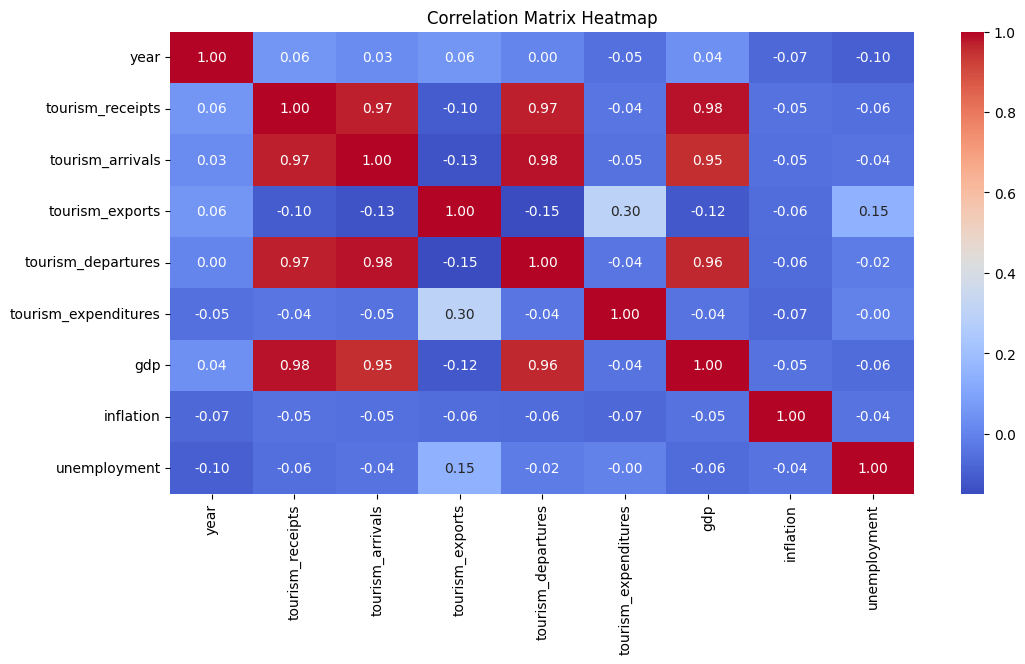

In [15]:
plt.figure(figsize=(12, 6))
sb.heatmap(df_copy_numerical.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

### It is clear from the correlation matrix that gdp has the strongest positive correlation with tourism_receipts, followed by tourism_departures, and finally, tourism_arrivals. Since the exact number of tourists entering and leaving a country is not a variable that we are interested in analysing, we focus on tourism_receipts, which details the Income from international tourism (in current US dollars)

### Thus, we move forward in analysing the contribution of tourism to a country’s GDP, as well as how tourism spending impacts national economies, and compare tourism arrivals, expenditures, and receipts relative to GDP and unemployment across countries and regions

In [16]:
df_copy = df_copy[['country','year','tourism_receipts','tourism_exports','tourism_expenditures','gdp','inflation','unemployment']]
df_copy # We proceed to work with a targeted dataset

,country,year,tourism_receipts,tourism_exports,tourism_expenditures,gdp,inflation,unemployment
0,Aruba,1999,7.820000e+08,62.542949,9.495387,1.722905e+09,2.280372,NaN
1,Africa Eastern and Southern,1999,8.034209e+09,12.204030,7.760536,2.654293e+11,7.819865,NaN
2,Africa Western and Central,1999,1.443613e+09,3.974476,6.147291,1.394683e+11,0.372266,NaN
3,Angola,1999,3.100000e+07,0.583858,2.489638,6.152923e+09,248.195902,NaN
4,Albania,1999,2.180000e+08,55.969191,3.699007,3.212122e+09,0.389438,18.400
...,...,...,...,...,...,...,...,...
3795,Viet Nam,2020,3.232000e+09,1.113603,1.615964,3.466157e+11,3.220934,2.103
3796,Vanuatu,2020,6.700000e+07,50.397520,5.018555,9.094210e+08,5.329351,4.046
3797,Samoa,2020,2.306000e+07,19.790741,0.477719,8.688984e+08,-1.568912,NaN
3798,South Africa,2020,2.716000e+09,2.885460,2.016499,3.379747e+11,3.210036,29.217


## Now, we proceed to inspect the 'country' column, in order to isolate specialised sub-groups

In [17]:
target_country_subgroups = [
    'High income', 
    'Heavily indebted poor countries (HIPC)', 
    'IDA total', 
    'IDA blend', 
    'Least developed countries: UN classification', 
    'OECD members', 
    'Pre-demographic dividend', 
    'Post-demographic dividend', 
    'Latin America & the Caribbean (IDA & IBRD countries)', 
    'Middle East & North Africa (IDA & IBRD countries)', 
    'Sub-Saharan Africa (IDA & IBRD countries)', 
    'World', 
    'Lower middle income', 
    'Early-demographic dividend', 
    'IDA only', 
    'Arab World', 
    'Fragile and conflict affected situations', 
    'Low income', 
    'Europe & Central Asia (IDA & IBRD countries)', 
    'Small state'
]

df_country_subgroups = df_copy[df_copy['country'].isin(target_country_subgroups)]
df_copy_filtered = df_copy[~df_copy['country'].isin(target_country_subgroups)]
df_copy_filtered.reset_index(drop=True,inplace=True)

### We proceed to create pivot tables for the relevant data groups, in order to concentrate relevant data into separate data structures

In [18]:
# Now, we proceed to pivot the dataframe, so that we can view changes by year

pivoted_df_filtered = df_copy_filtered.pivot_table(
    index='country',       
    columns='year',      
    values=['gdp','tourism_receipts', 'tourism_exports', 'tourism_expenditures','inflation','unemployment'],
    aggfunc='mean' # We aggregate such that the mean of each metric is computed for each year
)

In [19]:
pivoted_df_specialised = df_country_subgroups.pivot_table(
    index='country',       
    columns='year',      
    values=['gdp','tourism_receipts', 'tourism_exports', 'tourism_expenditures','inflation','unemployment'],
    aggfunc='mean' 
)

### First, we plot and analyse the changes in GDP VS tourism_receipts, to observe correlations (if any)

In [20]:
gdp_data = pivoted_df_filtered['gdp']
tourism_data = pivoted_df_filtered['tourism_receipts']

countries = gdp_data.index

fig = go.Figure()

initial_country = countries[0]  # Default to the first country
gdp_country = gdp_data.loc[initial_country]
tourism_country = tourism_data.loc[initial_country]


fig.add_trace(
    go.Scatter(
        x=gdp_country.index, 
        y=gdp_country.values,
        mode='lines+markers',
        name='GDP',
        yaxis='y1'
    )
)

fig.add_trace(
    go.Scatter(
        x=tourism_country.index, 
        y=tourism_country.values,
        mode='lines+markers',
        name='Tourism Income',
        yaxis='y2'
    )
)

fig.update_layout(
    title=f"Changes in GDP and Tourism Receipts",
    xaxis_title="Year",
    yaxis=dict(title="GDP", side='left'),
    yaxis2=dict(title="Tourism Receipts", overlaying='y', side='right'),
    legend=dict(x=0.5, y=-0.2, orientation='h')
)

dropdown_buttons = []

for country in countries:
    gdp_country = gdp_data.loc[country]
    tourism_country = tourism_data.loc[country]

    dropdown_buttons.append(
        dict(
            label=country,
            method='update',
            args=[
                {'x': [gdp_country.index, tourism_country.index],  # Update x data
                 'y': [gdp_country.values, tourism_country.values]},  # Update y data
                {'title': f"Changes in GDP and Tourism Receipts for {country}"}  # Update title
            ]
        )
    )

fig.update_layout(
    updatemenus=[
        dict(
            buttons=dropdown_buttons,
            direction="down",
            showactive=True,
            x=0.5,
            y=1.15
        )
    ]
)

fig.show()

## From the interactive plot above, we can observe the trends of multiple countries over the years 1999-2020, with respect to their GDP and Income from Tourism.

### We now proceed to construct a model that can help us predict the gdp of a country, with tourism_receipts as our predictor variable

# Multiple Linear Regression Model Construction

#### We begin our model construction with a Multiple Linear Regression Model. Through the use of Hypothesis Testing, we can determine the suitability of multiple variables in the model. 

#### We set our Null Hypothesis, H0, to reflect the reduced model, and our Alternative Hypothesis, H1, to reflect the full model

In [21]:
import statsmodels.api as sm

X = df_copy_filtered[['tourism_exports', 'tourism_receipts', 'tourism_expenditures']]  # Independent variables
y = df_copy_filtered['gdp']  # Dependent variable

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    gdp   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     6912.
Date:                Thu, 26 Dec 2024   Prob (F-statistic):               0.00
Time:                        16:22:18   Log-Likelihood:                -99850.
No. Observations:                3438   AIC:                         1.997e+05
Df Residuals:                    3434   BIC:                         1.997e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.201e+11 

### From the results obtained through our implementation of the Ordinary Least Squares (OLS) Regression Model, we observe that the F-statistic is significantly large, with a corresponding p-value small enough to reject the null hypothesis. This indicates that the full model, which includes all three variables — tourism_receipts, tourism_exports, and tourism_expenditures — collectively explains 85.8% of the variability in GDP. Therefore, the full model is statistically significant and well-suited for predicting GDP, compared to a model with lesser predictors.

### Now, we will proceed to check for interaction effects between the terms, in the interest of thoroughness

In [22]:
model = smf.ols('gdp ~ tourism_exports * tourism_receipts * tourism_expenditures', data=df_copy_filtered).fit() # Checking for all interaction terms

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    gdp   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     3281.
Date:                Thu, 26 Dec 2024   Prob (F-statistic):               0.00
Time:                        16:22:18   Log-Likelihood:                -99697.
No. Observations:                3438   AIC:                         1.994e+05
Df Residuals:                    3430   BIC:                         1.995e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

### The updated regression model explains 87.0% of the variation in GDP, as indicated by the adjusted R-squared value, which is slightly lower than the previous model but still represents a good fit. Tourism_receipts is a significant positive predictor of GDP (β=47.2570, p<0.001), while tourism_exports has a significant negative effect (β=−1.502e+10,  p<0.001). 

### Additionally, the interaction between tourism_exports and tourism_receipts is significant ( β=3.6620,  p<0.001), indicating that the effect of tourism_receipts on GDP is influenced by the level of tourism_exports. 

### The interaction between tourism_receipts and tourism_expenditures is also significant ( β=−1.1046,  p=0.023), showing a negative moderating effect. 

### The higher-order interaction among all three predictors (β=−0.3866, p<0.001) highlights complex interdependencies between these factors in predicting GDP. However, the model's condition number (7.41e+12) suggests potential multicollinearity, indicating that some predictors may be highly correlated. Overall, the model provides meaningful insights into how the predictors and their interactions influence GDP but warrants further refinement to address multicollinearity issues.

In [23]:
# Now, we fit the refined model
refined_model = smf.ols(
    'gdp ~ tourism_receipts + tourism_exports + tourism_exports:tourism_receipts + tourism_receipts:tourism_expenditures + tourism_exports:tourism_receipts:tourism_expenditures',
    data=df_copy_filtered
).fit()

print(refined_model.summary())


                            OLS Regression Results                            
Dep. Variable:                    gdp   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     4512.
Date:                Thu, 26 Dec 2024   Prob (F-statistic):               0.00
Time:                        16:22:18   Log-Likelihood:                -99724.
No. Observations:                3438   AIC:                         1.995e+05
Df Residuals:                    3432   BIC:                         1.995e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [25]:
# Manually input data based on the above regression results
results = {
    "Predictor": [
        "Intercept", 
        "Tourism Receipts", 
        "Tourism Exports", 
        "Tourism Exports:Tourism Receipts", 
        "Tourism Receipts:Tourism Expenditures", 
        "Tourism Exports:Tourism Receipts:Tourism Expenditures"
    ],
    "Coefficient": [1.149e+11, 51.9694, -5.709e+09, 2.7700, -1.5880, -0.2836],
    "Lower CI": [7.04e+10, 45.744, -7.57e+09, 1.919, -2.500, -0.353],
    "Upper CI": [1.59e+11, 58.194, -3.85e+09, 3.361, -0.676, -0.214],
    "P-value": [0.000, 0.000, 0.000, 0.000, 0.001, 0.000]
}

df_results = pd.DataFrame(results)

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_results["Coefficient"],
    y=df_results["Predictor"],
    mode="markers",
    marker=dict(color="blue", size=10),
    error_x=dict(
        type="data",
        symmetric=False,
        array=df_results["Upper CI"] - df_results["Coefficient"],
        arrayminus=df_results["Coefficient"] - df_results["Lower CI"],
        thickness=1.5,
        width=3
    ),
    name="Coefficient"
))

significant = df_results["P-value"] < 0.05
fig.add_trace(go.Scatter(
    x=df_results[significant]["Coefficient"],
    y=df_results[significant]["Predictor"],
    mode="markers",
    marker=dict(color="red", size=10, symbol="star"),
    name="Significant"
))

fig.update_layout(
    title="Graphical Representation of Regression Coefficients with Confidence Intervals",
    xaxis_title="Coefficient Value",
    yaxis_title="Predictors",
    yaxis=dict(autorange="reversed"),
    height=600,
    width=1200,
    showlegend=True
)

fig.show()
